# Segmentation of HAADF-STEM Image 
- STEM stands for scanning transmission electron microscope.
- HAADF-STEM image of Cu grain boundary  

    <img src="https://www.mpie.de/3754853/original-1518446993.jpg?t=eyJ3aWR0aCI6NjgyLCJvYmpfaWQiOjM3NTQ4NTN9--b2d6ffb46e71c493c1f79afafdfb3115ab258941" alt="Cu grain boundary" width="400" height="400">   
- Image segmentation can be used to relate the digital signal to crystallographic patterns  
- pystem is a library developed by my colleague Ning Wang
- pystem uses machine learning clustering to determine the segmentations of STEM images 
- Here I created pyiron jobs for performing image segmentation using pystem

In [1]:
from pyiron_base import Project
import pySTEMJOB as psj
import numpy as np

In [2]:
pr = Project('test-pySTEM')

In [3]:
descriptor = 'local_correlation_map'
pr.remove_jobs_silently(recursive=True)
job = pr.create_job(job_type=psj.pystem_Seg, job_name="stem_"+descriptor)

This group does not exist in the HDF5 file stem_local_correlation_map
This group does not exist in the HDF5 file stem_power_spectrum
This group does not exist in the HDF5 file stem_reflection_symmetry_maximums


In [5]:
job.image_path = 'CuGB.npy'
job.image_load()

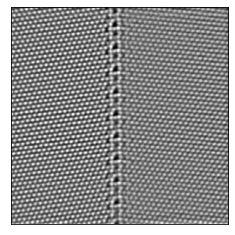

In [6]:
job.plot_image()

In [7]:
#step = 5
job.descriptor_name= descriptor
job.run()

The job stem_local_correlation_map was saved and received the ID: 396
method: direct


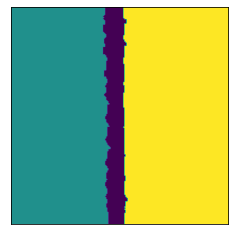

In [8]:
job.plot_label()

In [9]:
job['output/generic/labels']

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]], dtype=int32)

In [9]:
#image_shape = job.image.shape
#image_shape = (2,2)
#np.zeros(3,2)

In [10]:
descriptors = ['local_correlation_map','power_spectrum','reflection_symmetry_maximums']
labels=[]
for name in descriptors:
    job = pr.create_job(job_type=psj.pystem_Seg,job_name="stem_"+name)
    job.image_path = 'CuGB.npy'
    job.image_load()
    #labels.append(np.zeros(job.image.shape))
    job.descriptor_name=name
    job.run()
    labels.append(job['output/generic/labels'])

2020-10-30 00:37:13,224 - pyiron_log - WARNING - The job stem_local_correlation_map is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


The job stem_power_spectrum was saved and received the ID: 397
The job stem_reflection_symmetry_maximums was saved and received the ID: 398


In [11]:
# psj.plot_individual(labels[0])
type(labels[0])

numpy.ndarray

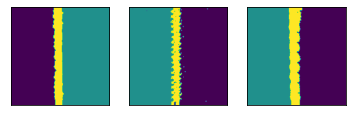

In [14]:
import matplotlib.pyplot as plt
plt.subplot(1, 3, 1)
psj.plot_individual(labels[0])
plt.subplot(1, 3, 2)
psj.plot_individual(labels[1])
plt.subplot(1, 3, 3)
psj.plot_individual(labels[2])
